                                               Stock Market Analysis

#  Objectives :

# Import libraries  :

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU


import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis :

In [154]:
data=pd.read_csv('Reliance data.csv')
data

,Date,Open,High,Low,Close,Volume
0,02-Jan-91,115.00,115.00,105.00,107.50,0
1,03-Jan-91,107.50,107.50,95.00,97.50,0
2,07-Jan-91,105.00,107.50,97.50,105.00,0
3,09-Jan-91,105.00,105.00,101.25,102.50,0
4,11-Jan-91,102.50,110.00,100.00,108.75,0
...,...,...,...,...,...,...
8245,22-Dec-23,2562.20,2580.55,2548.00,2564.70,524558
8246,26-Dec-23,2570.00,2592.90,2563.00,2577.50,90284
8247,27-Dec-23,2578.50,2599.35,2572.25,2586.35,103806
8248,28-Dec-23,2587.00,2611.35,2587.00,2605.80,183810


In [155]:
data.shape

(8250, 6)

In [156]:
data.head()

,Date,Open,High,Low,Close,Volume
0,02-Jan-91,115.0,115.0,105.00,107.50,0
1,03-Jan-91,107.5,107.5,95.00,97.50,0
2,07-Jan-91,105.0,107.5,97.50,105.00,0
3,09-Jan-91,105.0,105.0,101.25,102.50,0
4,11-Jan-91,102.5,110.0,100.00,108.75,0


In [157]:
data.tail()

,Date,Open,High,Low,Close,Volume
8245,22-Dec-23,2562.20,2580.55,2548.00,2564.70,524558
8246,26-Dec-23,2570.00,2592.90,2563.00,2577.50,90284
8247,27-Dec-23,2578.50,2599.35,2572.25,2586.35,103806
8248,28-Dec-23,2587.00,2611.35,2587.00,2605.80,183810
8249,29-Dec-23,2608.05,2614.80,2579.15,2584.85,848448


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8250 non-null   object 
 1   Open    8250 non-null   float64
 2   High    8250 non-null   float64
 3   Low     8250 non-null   float64
 4   Close   8250 non-null   float64
 5   Volume  8250 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 386.8+ KB


In [159]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [160]:
data.duplicated().sum()

0

In [161]:
data.describe()

,Open,High,Low,Close,Volume
count,8250.000000,8250.000000,8250.000000,8250.000000,8.250000e+03
mean,909.394792,921.429867,896.872382,908.679927,1.804710e+06
std,731.893397,741.337746,722.134733,731.499763,7.996243e+06
min,92.500000,95.000000,88.750000,91.250000,0.000000e+00
25%,288.000000,292.550000,283.812500,288.462500,2.498165e+05
50%,814.225000,822.975000,804.850000,813.225000,6.748610e+05
75%,1213.675000,1232.687500,1193.250000,1211.787500,2.072138e+06
max,3235.000000,3252.100000,3135.250000,3216.300000,3.973114e+08


In [162]:
data.columns

Index(['Date', 'Open', 'High', 'Low ', 'Close ', 'Volume'], dtype='object')

In [163]:
data.columns = data.columns.str.strip()

In [164]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

In [165]:
data.set_index('Date', inplace=True)

# Visualization :

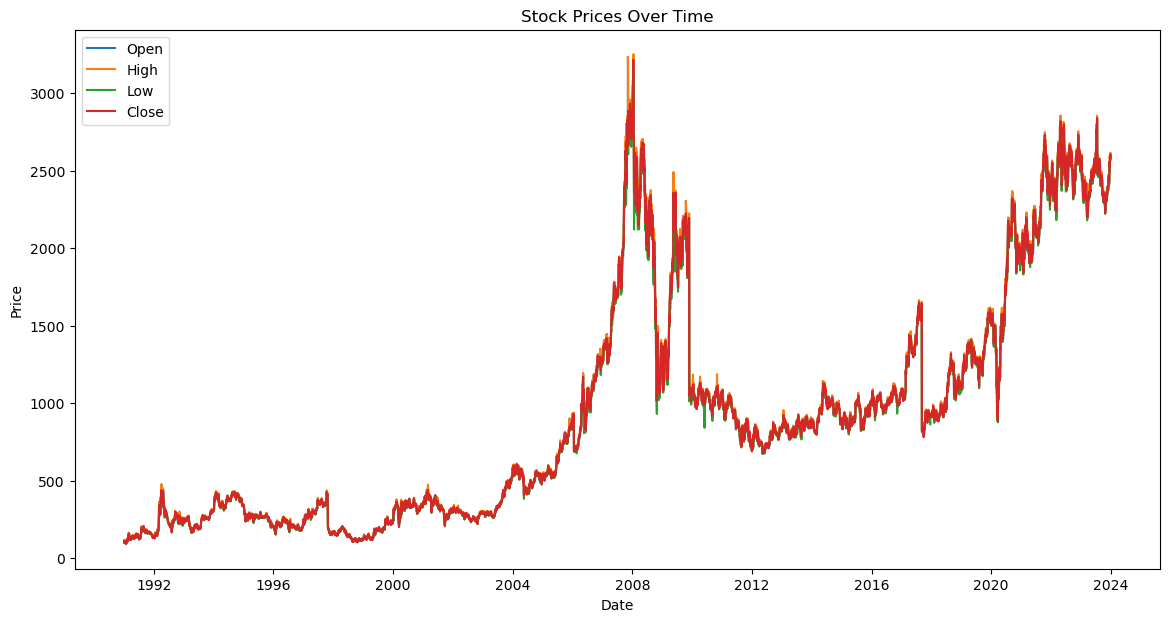

In [166]:
# Stock Prices Over Time

plt.figure(figsize=(14, 7))
plt.plot(data['Open'], label='Open')
plt.plot(data['High'], label='High')
plt.plot(data['Low'], label='Low')
plt.plot(data['Close'], label='Close')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

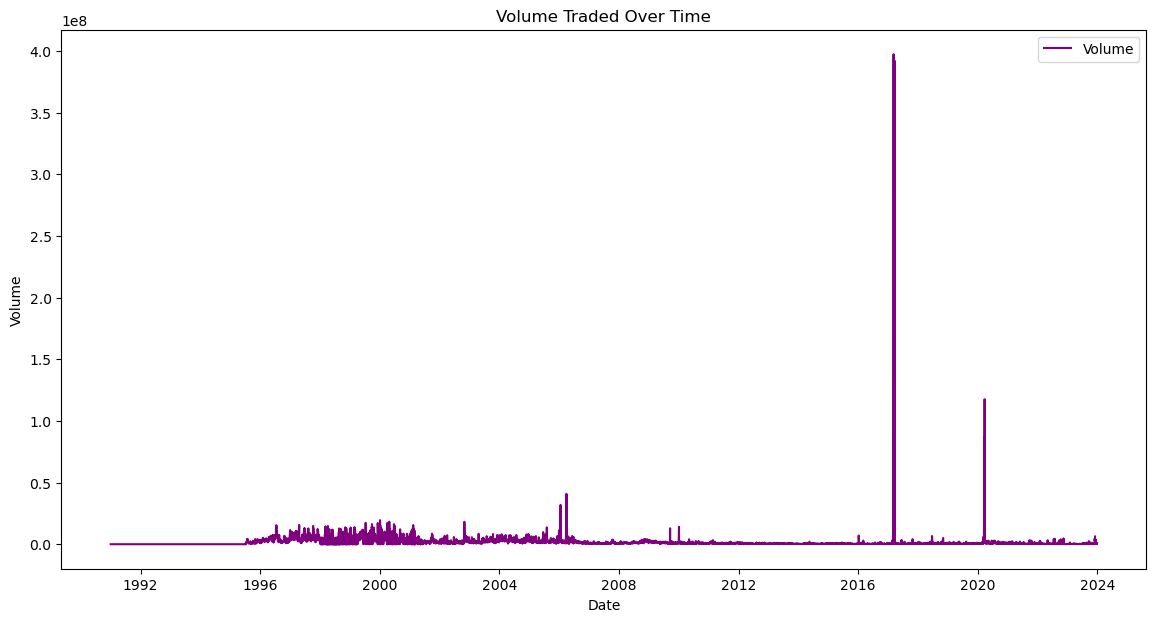

In [167]:
# Volume Traded Over Time

plt.figure(figsize=(14, 7))
plt.plot(data['Volume'], label='Volume', color='purple')
plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

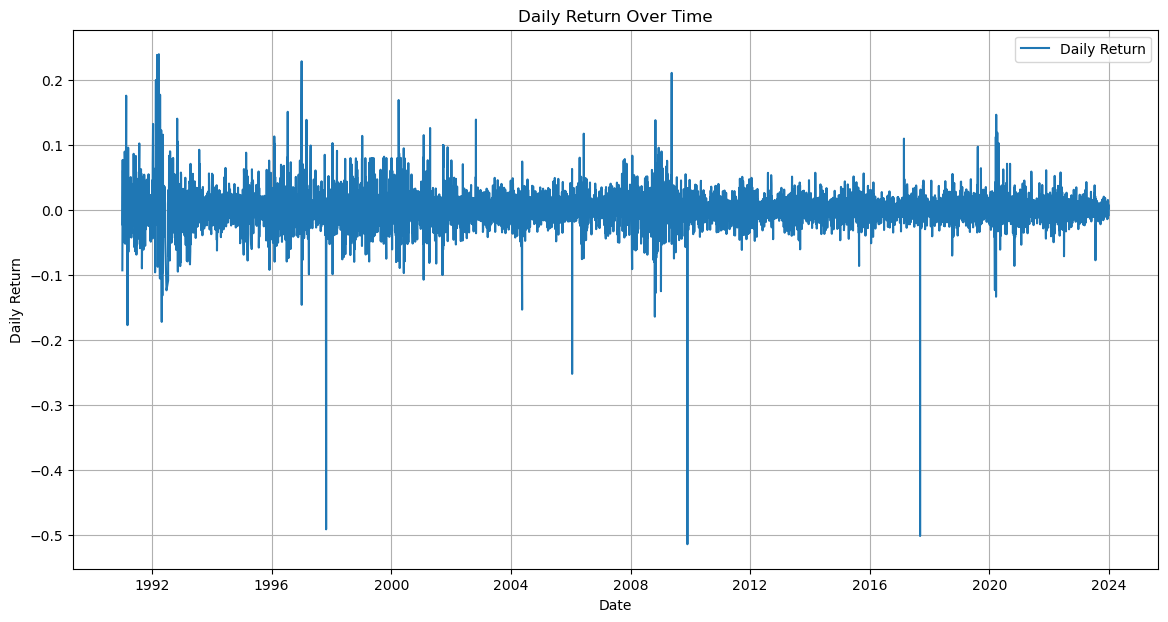

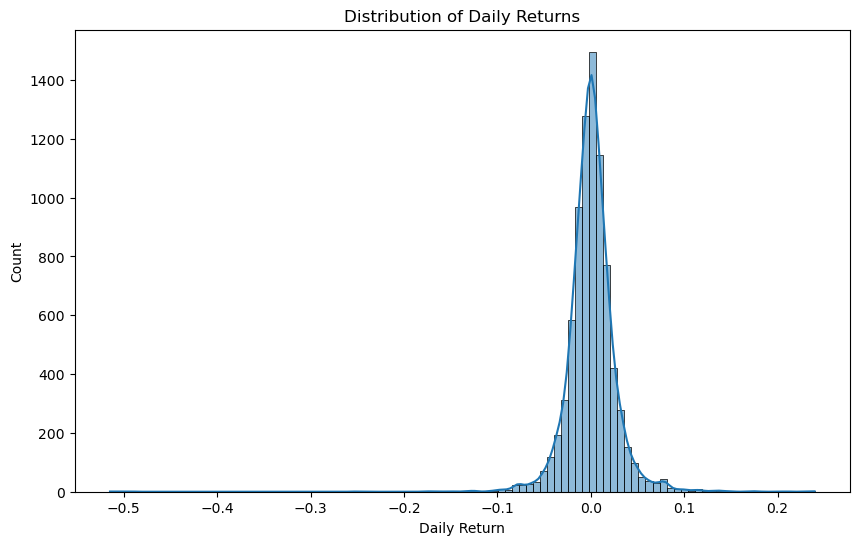

In [168]:
data["Daily Return"] = data["Close"].pct_change()
plt.figure(figsize=(14,7))
plt.plot(data["Daily Return"],label="Daily Return")
plt.title("Daily Return Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10,6))
sn.histplot(data['Daily Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.show()

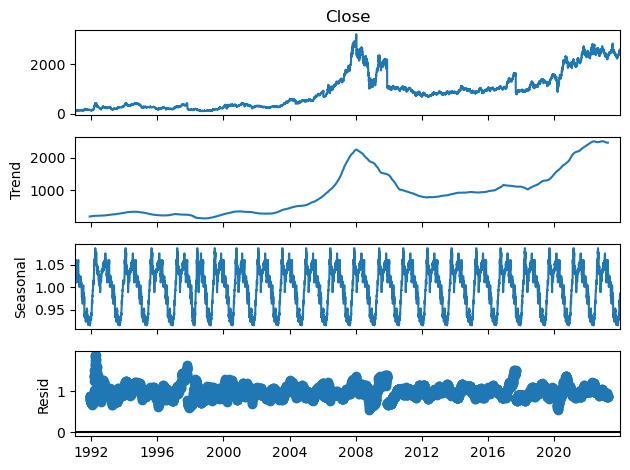

In [169]:
# Seasonal Decomposition for separating the time series into trend, seasonality, and residual components

sd=seasonal_decompose(data['Close'], model="multiplicative", period=365)
sd.plot()
plt.show()



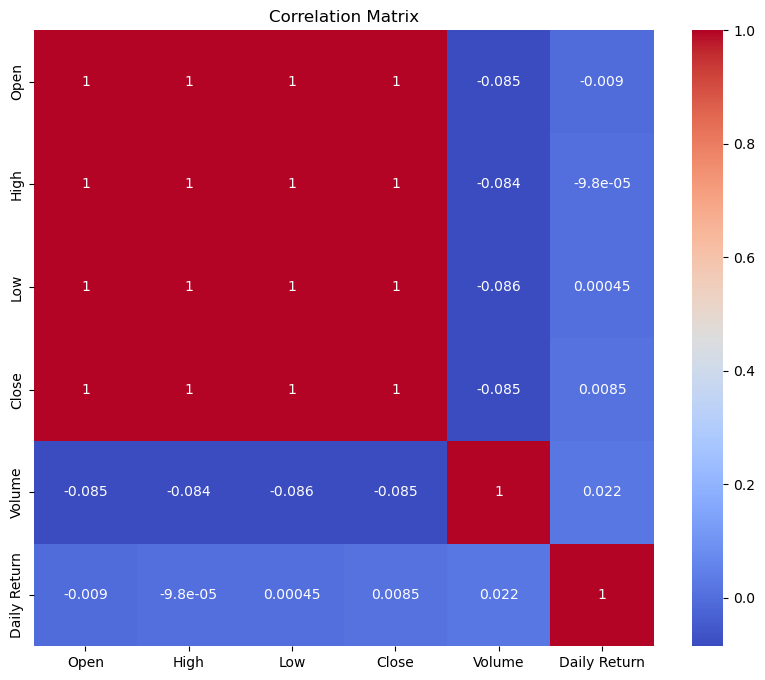

In [170]:
# Correlation Analysis

corr_matrix=data.corr()

plt.figure(figsize=(10,8))
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [171]:
# Finding long-term and short-term trends Moving average

data1 = data.copy()
data1['30-day MA'] = data['Close'].rolling(window=30).mean()
data1['100-day MA'] = data['Close'].rolling(window=100).mean()

In [172]:
data1.head()

,Open,High,Low,Close,Volume,Daily Return,30-day MA,100-day MA
Date,,,,,,,,
1991-01-02,115.0,115.0,105.00,107.50,0,NaN,NaN,NaN
1991-01-03,107.5,107.5,95.00,97.50,0,-0.093023,NaN,NaN
1991-01-07,105.0,107.5,97.50,105.00,0,0.076923,NaN,NaN
1991-01-09,105.0,105.0,101.25,102.50,0,-0.023810,NaN,NaN
1991-01-11,102.5,110.0,100.00,108.75,0,0.060976,NaN,NaN


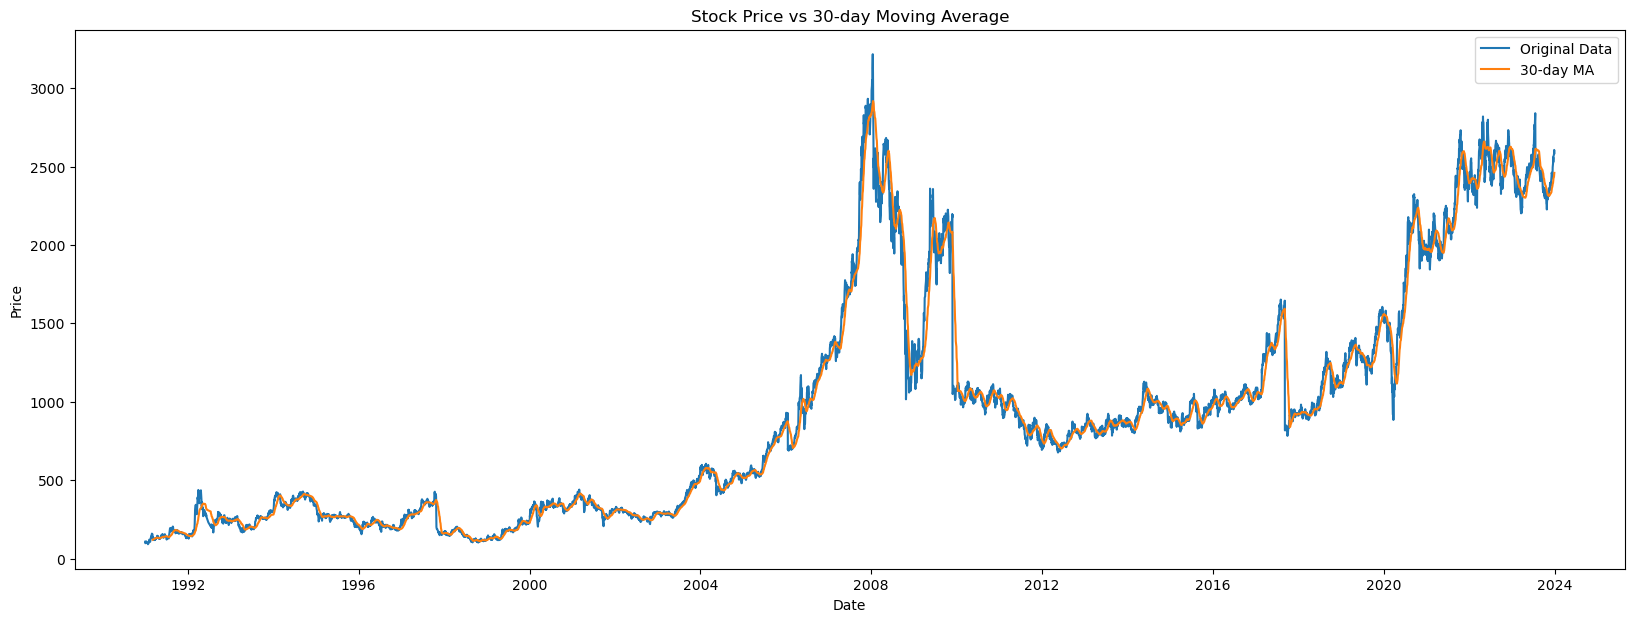

In [173]:
plt.figure(figsize=(20,7))
plt.plot(data1['Close'], label='Original Data')
plt.plot(data1['30-day MA'], label='30-day MA')
plt.legend()
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

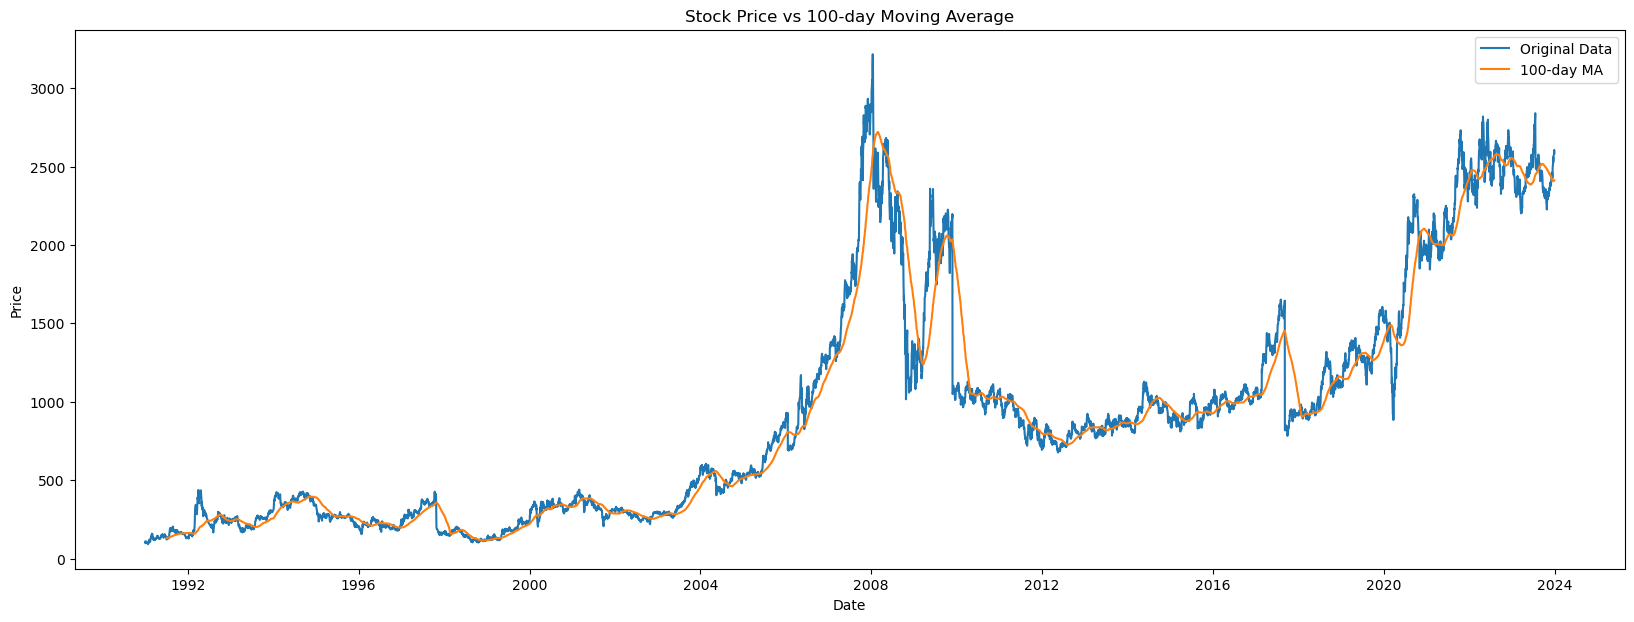

In [174]:
plt.figure(figsize=(20, 7))
plt.plot(data1['Close'], label='Original Data')
plt.plot(data1['100-day MA'], label='100-day MA')
plt.legend()
plt.title('Stock Price vs 100-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### the factors that influence the stock prices

# Model Building :

In [175]:
# data for model building 

close_data=np.array(data['Close'])
close_data1=close_data.reshape(-1, 1)

In [176]:
scaler=MinMaxScaler(feature_range=(0, 1))

scaled_data=scaler.fit_transform(close_data1)
print(scaled_data)


[[0.00519992]
 [0.00199997]
 [0.00439993]
 ...
 [0.79841923]
 [0.80464313]
 [0.79793923]]


In [177]:
# Create sequences for the model (close_data)

def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 50
x, y = create_sequences(scaled_data, sequence_length)

In [178]:
# splitting the close_data

split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

### 1. RNN Model Building :

In [179]:
# Build the RNN model

rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')

rnn_model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_13 (SimpleRNN)       │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [180]:
# Train the RNN model
rnn_history = rnn_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0010 - val_loss: 8.2192e-04
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.5559e-04 - val_loss: 2.2496e-04
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.3525e-04 - val_loss: 1.9638e-04
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.0227e-04 - val_loss: 1.9389e-04
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.1788e-04 - val_loss: 2.2096e-04
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.0228e-04 - val_loss: 1.6997e-04
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.0769e-04 - val_loss: 2.0529e-04
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.1972e-04 - val_loss: 1.6156e-04
Epoch 9/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 6.9066e-05 - val_loss: 2.4202e-04
Epoch 10/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.0537e-04 - val_loss: 1.8529e-04
Epoch 11/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step

In [181]:
# Evaluate the RNN model
rnn_loss = rnn_model.evaluate(x_test, y_test)


# Predict with the RNN model
rnn_y_pred = rnn_model.predict(x_test)
rnn_y_pred = scaler.inverse_transform(rnn_y_pred)
rnn_y_test = scaler.inverse_transform(y_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3192e-04
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [182]:
rnn_mse, rnn_rmse, rnn_r2 = calculate_metrics(rnn_y_test, rnn_y_pred)

print(f'Test loss (RNN): {rnn_loss}')
print(f"RNN Model - MSE: {rnn_mse}, RMSE: {rnn_rmse}, R²: {rnn_r2}")

Test loss (RNN): 0.0001990724413190037
RNN Model - MSE: 1944.129170832665, RMSE: 44.092280172754336, R²: 0.9947074442569834


### 2. LSTM Model Building :

In [183]:
# Build the LSTM model

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')


lstm_model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [184]:
history = lstm_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.0260 - val_loss: 0.0017
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 3.3991e-04 - val_loss: 7.9011e-04
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 2.5070e-04 - val_loss: 6.2330e-04
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 2.6755e-04 - val_loss: 5.2690e-04
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 2.3092e-04 - val_loss: 0.0013
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 2.8567e-04 - val_loss: 4.5724e-04
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 1.8502e-04 - val_loss: 0.0011
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 2.2240e-04 - val_loss: 4.2708e-04
Epoch 9/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 2.6019e-04 - val_loss: 3.8980e-04
Epoch 10/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 2.5898e-04 - val_loss: 3.8507e-04
Epoch 11/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 1.8

In [185]:
# Evaluate the LSTM model
lstm_loss = lstm_model.evaluate(x_test, y_test)

# Predict with the LSTM model
lstm_y_pred = lstm_model.predict(x_test)
lstm_y_pred = scaler.inverse_transform(lstm_y_pred)
lstm_y_test = scaler.inverse_transform(y_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9337e-04
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [186]:
lstm_mse, lstm_rmse, lstm_r2 = calculate_metrics(lstm_y_test, lstm_y_pred)

print(f'Test loss (LSTM): {lstm_loss}')
print(f"LSTM Model - MSE: {lstm_mse}, RMSE: {lstm_rmse}, R²: {lstm_r2}")

Test loss (LSTM): 0.00021697448391932994
LSTM Model - MSE: 2118.9596230654843, RMSE: 46.03215857490809, R²: 0.9942314985595981


### 3. GRU Model Building :

In [187]:
# Build the GRU model

gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(sequence_length, 1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

gru_model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_5 (GRU)                     │ (None, 50)             │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

In [188]:
# Train the GRU model

gru_history = gru_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0191 - val_loss: 2.6703e-04
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 1.1556e-04 - val_loss: 2.6451e-04
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 1.5358e-04 - val_loss: 2.4602e-04
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 1.5033e-04 - val_loss: 2.1199e-04
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 9.4552e-05 - val_loss: 2.0048e-04
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 1.0056e-04 - val_loss: 1.8812e-04
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 1.4768e-04 - val_loss: 2.1518e-04
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 1.0725e-04 - val_loss: 1.8350e-04
Epoch 9/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 1.5225e-04 - val_loss: 1.9389e-04
Epoch 10/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.3711e-04 - val_loss: 1.7677e-04
Epoch 11/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/st

In [189]:
# Evaluate the GRU model
gru_loss = gru_model.evaluate(x_test, y_test)


# Predict with the GRU model
gru_y_pred = gru_model.predict(x_test)
gru_y_pred = scaler.inverse_transform(gru_y_pred)
gru_y_test = scaler.inverse_transform(y_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.1130e-04
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [190]:
gru_mse, gru_rmse, gru_r2 = calculate_metrics(gru_y_test, gru_y_pred)

print(f'Test Loss (GRU): {gru_loss}')
print(f"GRU Model - MSE: {gru_mse}, RMSE: {gru_rmse}, R²: {gru_r2}")

Test Loss (GRU): 0.0001649194600759074
GRU Model - MSE: 1610.5937845446101, RMSE: 40.13220383363727, R²: 0.9956154367148313


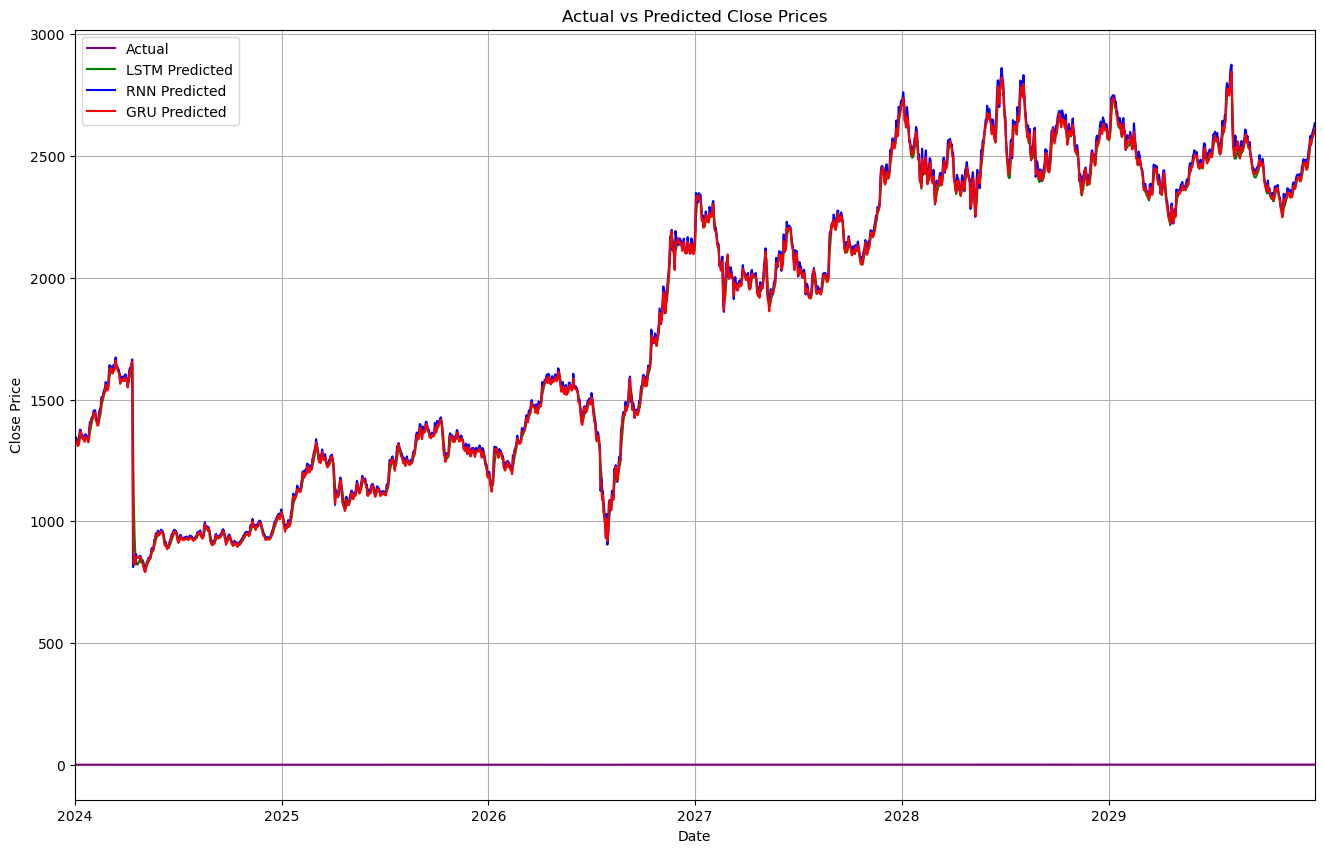

In [191]:
start_date = pd.Timestamp('2024-01-01')
end_date = pd.Timestamp('2029-12-31')
date_range = pd.date_range(start=start_date, end=end_date, periods=len(y_test))

plt.figure(figsize=(16, 10))
plt.plot(date_range, y_test, label='Actual', color='purple')
plt.plot(date_range, lstm_y_pred, label='LSTM Predicted', color='green')
plt.plot(date_range, rnn_y_pred, label='RNN Predicted', color='blue')
plt.plot(date_range, gru_y_pred, label='GRU Predicted', color='red')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xlim(start_date, end_date)
plt.grid(True)
plt.show()

### Volume Prediction Over Time :

In [192]:
# Prepare the data
volume_data = np.array(data['Volume'])
volume_data = volume_data.reshape(-1, 1)

scaler = StandardScaler()
scaled_volume_data = scaler.fit_transform(volume_data)

def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 50
x, y = create_sequences(scaled_volume_data, sequence_length)

split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [193]:
# Build, train, and evaluate RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')
rnn_history = rnn_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
rnn_loss = rnn_model.evaluate(x_test, y_test)
rnn_y_pred = rnn_model.predict(x_test)
rnn_y_pred = scaler.inverse_transform(rnn_y_pred)

# Build, train, and evaluate LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_history = lstm_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
lstm_loss = lstm_model.evaluate(x_test, y_test)
lstm_y_pred = lstm_model.predict(x_test)
lstm_y_pred = scaler.inverse_transform(lstm_y_pred)

# Build, train, and evaluate GRU model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(sequence_length, 1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')
gru_history = gru_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
gru_loss = gru_model.evaluate(x_test, y_test)
gru_y_pred = gru_model.predict(x_test)
gru_y_pred = scaler.inverse_transform(gru_y_pred)


Epoch 1/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1.3696 - val_loss: 0.2378
Epoch 2/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.7583 - val_loss: 0.2444
Epoch 3/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.8108 - val_loss: 0.2621
Epoch 4/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.4138 - val_loss: 0.2957
Epoch 5/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.5431 - val_loss: 0.2747
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2328
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Epoch 1/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 1.3718 - val_loss: 0.2018
Epoch 2/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 1.0009 - val_loss: 0.2214
Epoch 3/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 1.3256 - val_loss: 0.2018
Epoch 4/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.7802 - val_loss: 0.2036
Epoch 5/5
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.7200 - val_loss: 0.2062
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0

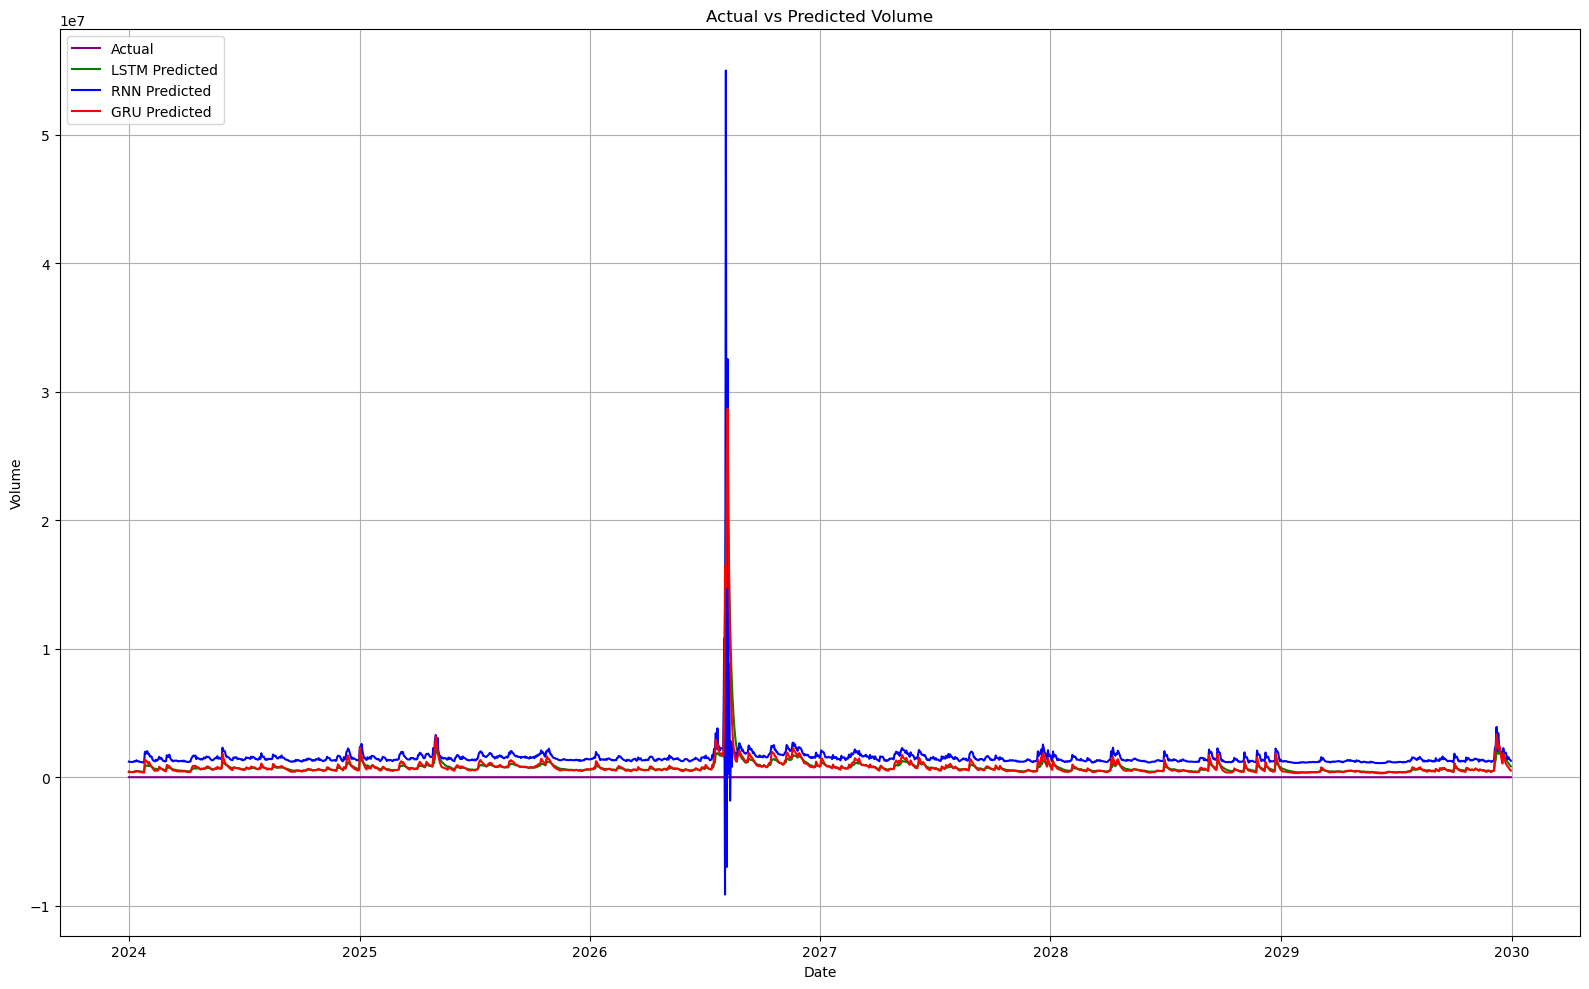

In [194]:
# Plotting the results
start_date = pd.Timestamp('2024-01-01')
end_date = pd.Timestamp('2029-12-31')
date_range = pd.date_range(start=start_date, end=end_date, periods=len(y_test))

fig, ax1 = plt.subplots(figsize=(16, 10))

# Plot actual and predicted volume values
ax1.plot(date_range, y_test, label='Actual', color='purple')
ax1.plot(date_range, lstm_y_pred, label='LSTM Predicted', color='green')
ax1.plot(date_range, rnn_y_pred, label='RNN Predicted', color='blue')
ax1.plot(date_range, gru_y_pred, label='GRU Predicted', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume')
ax1.set_title('Actual vs Predicted Volume')
ax1.legend(loc='upper left')
ax1.grid(True)
fig.tight_layout()
plt.show()

## Conclusion:

In [195]:
# Collect results in a dictionary
results = {
    'Model': ['RNN', 'LSTM', 'GRU'],
    'Test Loss': [rnn_loss, lstm_loss, gru_loss],
    'MSE': [rnn_mse, lstm_mse, gru_mse],
    'RMSE': [rnn_rmse, lstm_rmse, gru_rmse],
    'R²': [rnn_r2, lstm_r2, gru_r2]
}

# Convert dictionary to DataFrame
results_df = pd.DataFrame(results)
results_df


,Model,Test Loss,MSE,RMSE,R²
0,RNN,0.274678,1944.129171,44.092280,0.994707
1,LSTM,0.206210,2118.959623,46.032159,0.994231
2,GRU,0.203389,1610.593785,40.132204,0.995615
